# Grade: /100 Mark(s)

# Assignment 02: Maximum Likelihood (Sung Hyun Kim/skim2536)


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can used the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X = x$.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [9]:
#Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import minimize
from scipy.special import gammaln
from sklearn import linear_model
from IPython.display import display


### Question 1: /10 Marks

The negative log likelihood for one observation of a single Poisson random variable is

$$\ell(\lambda; y) = -\Bigg(   y\cdot \ln(\lambda) - \lambda - \ln(y) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with the same parameter $\lambda$, is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

The negative log likelihood for a collection of $N$ observations, assuming each is independent and Poisson with a *different* parameter $\lambda$ for each one, is

$$\ell(\boldsymbol{\lambda}; \mathbf{y}) = -\sum_{i=1}^N\Bigg(   y_{i}\cdot \ln(\lambda_i) - \lambda_i - \ln(y_i!) \Bigg)$$

See the difference?

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood. Use numpy functions so that you don't need to use loops. Also, note that the $\sum_{i} \ln(y!)$ term does not affect the location of the maximum because it does not change with $\lambda$, and so you can (and should) omit the $ \ln(y!)$ in your function.

Your code should work for two cases:

First, it should work with a scalar $\lambda$ and a vector $y$. Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

Second, it should work with a vector $\lambda$ and a vector $y$, if they have the same length. (This is the last likelihood function described above.) Test your function by calling it with `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`. In this second case, the first $\lambda$ should be used to evaluate the first $y$, the second $\lambda$ should be used to evaluat the second $y$, and so on. ***YOU SHOULD NOT USE ANY LOOPS - BOTH CASES SHOULD WORK IF YOU CODE IT IN THE SIMPLEST WAY BECAUSE OF HOW NUMPY WORKS.**

**Answer the following below in markdown:** What happens when you set an element of lam to 0 or a negative number and why? 


#### Answer to Question 1

The returned value is nan (undefined). This is because the lamda variable is passed onto logarithmic function (np.log(lam)). Logarithm of zero and negative values cannot be dfined, thus the resulting value of the function will be non-defined.

In [10]:
def poissonNegLogLikelihood(lam,y):
    neg_log_lik = -1 * np.sum(y * np.log(lam) - lam)
    return neg_log_lik

# test with scalar lambda
lam = 1.3
y = np.array([2,1,0,0])
result = poissonNegLogLikelihood(lam,y)
print('Test 1 result (Using scalar lamda): {}\n'.format(result))

# test with vector lambda
lam = np.array([1,0.5,1,3])
y = np.array([2,1,0,0])
result = poissonNegLogLikelihood(lam,y)
print('Test 2 result (Using vector lamda): {}\n'.format(result))

# what happens when element of lamda to 0 or negative
# lam = -1
# y = np.array([2,1,0,0])
# result = poissonNegLogLikelihood(lam,y)
# print('(optional) Test 3 result (Using zero/negative lamda): {}\n'.format(result))

Test 1 result (Using scalar lamda): 4.412907206597527

Test 2 result (Using vector lamda): 6.193147180559945



---

### Question 2: /15 Marks

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$. Hint: Numpy implements the exponential using `np.exp`.

Hint: You should use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [11]:
def poissonRegressionNegLogLikelihood(b, X, y):
    #Enter the expression for lambda as shown above!
    lam = np.exp(np.dot(X,b))
    # lam = np.dot(X,b) #this code was used for testing for question3
    # Use poissonNegLogLikelihood to compute the likelihood
    neg_log_lik = poissonNegLogLikelihood(lam, y)
    return neg_log_lik

b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])

result = poissonRegressionNegLogLikelihood(b, X, y)
print("Test result: {}\n".format(result))

Test result: 3211.7843052468816



### Question 3: /10 Marks

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer! 

---


a) poissonRegresionNegLogLikelihood is passed onto poissonNegLogLikelihood, which utilises the first function to return calculated negative log lieklihood. Without exponential function, non of the potential negative values will be addressed, and negative values will be passed on for a logarithmic calculation

b) the programme will thrown arithmatic/runtime error as logarithmic cacluation of a negative numbers is not possible, thus impacting the overall performance of the model.


### Question 4: /5 Marks

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [12]:
def modelPrediction(b,X):
    yhat = np.exp(np.dot(X,b))
    return yhat

b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T
result = modelPrediction(b,X)
print("Test result: {}".format(result))


Test result: [ 148.4131591  2980.95798704  148.4131591 ]


### Question 5: /15 Marks

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

What is your estimated b? 

In [13]:
def fitModel(X,y):

    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    beta_start = np.zeros(X.shape[1])
    # Minimize the appropriate likelihood function
    mle = minimize(poissonRegressionNegLogLikelihood, beta_start, args=(X,y))
    print(mle)
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas

# Write code to show your estimated b.
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])
result = fitModel(X, y)
print("\nTest result (estimated b): {}\n".format(result))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -11.385182045207952
        x: [ 9.483e-01 -5.295e-01]
      nit: 9
      jac: [ 3.576e-07 -1.192e-07]
 hess_inv: [[ 2.771e-02 -4.303e-02]
            [-4.303e-02  1.054e-01]]
     nfev: 36
     njev: 12

Test result (estimated b): [ 0.94827556 -0.52953521]



### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 28.287152434220946
        x: [-1.517e-01  1.239e+00]
      nit: 8
      jac: [-2.384e-07 -2.384e-07]
 hess_inv: [[ 1.425e-02 -9.264e-03]
            [-9.264e-03  1.209e-02]]
     nfev: 30
     njev: 10


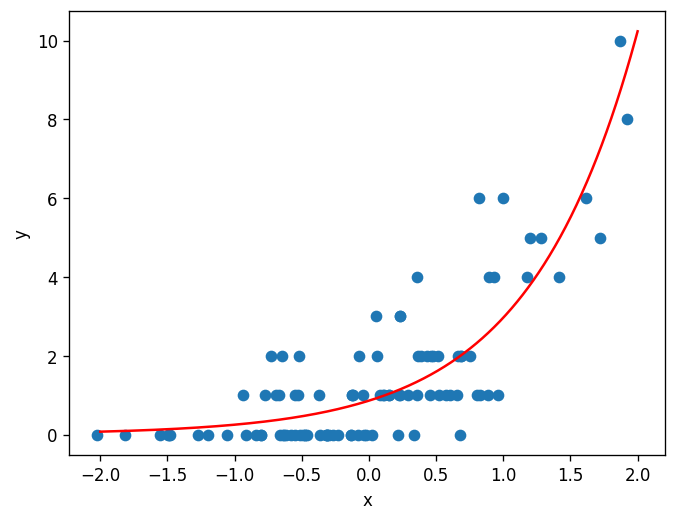

In [14]:
# Loading in the data.  
df = pd.read_csv('poisson_regression_data.csv')
x = df['x'].to_numpy()
y = df['y'].to_numpy()
fig, ax = plt.subplots(dpi = 120)

# Scatterplot the data. 
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y)
#plt.show()

# Fit the model.  Use your functions.  
x = df.x.values
X =  np.c_[np.ones(len(x)), x]
#print(X)
y= df.y.values

# Find the maximum likelihood estimates for the coefficients for this data
betas = fitModel(X,y)

# Make predictions on new data
newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(len(newx)), newx]

# Make predictions on the new data
y_predicted = modelPrediction(betas,newX)

#Finally, plot the predictions on the same axis and color the predictions red

plt.plot(newx, y_predicted, c='r')
plt.show()

### Question 7:  /20 Marks

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and and plot the predictions over the same range.


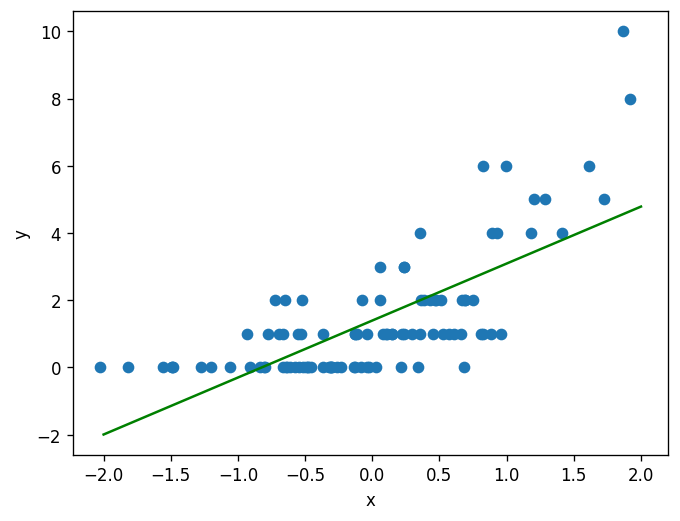

In [15]:
# Hint: Very similar to the previous assignment
# Read in the data
df = pd.read_csv('poisson_regression_data.csv')
x = df['x'].to_numpy().reshape(-1, 1)
y = df['y'].to_numpy()

# fit the model
olsLinRegFit = linear_model.LinearRegression().fit(x,y)

# Make predictions over the range -2 to 2
newx = np.linspace(-2,2,1001).reshape(-1, 1)
y_predicted = olsLinRegFit.predict(newx)

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x,y)
plt.plot(newx, y_predicted, c='g')
plt.show()


### Question 8: /5 Mark(s)

Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things.  Provide your answer below in markdown in fewer than 5 sentences. 

#### Answer

Knowing that this data, especially the y value keeps track of the "count of things", we can see that the Linear regression model predicts negative values for parameters around x < -1.0. Count of something cannot be a negative number, thus the model actively predicts incorrect value at certaint point. Moreover, with the knowledge of the data being a poisson distribution, we can say that a linear line is somewhat limited in describing and predicting a poisson distribution. For example, y count for values over x>0.5 increases in a non linear pattern, which is not fully modeled by the linear regression method.

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.